In [17]:
#
# データ分析でよく使うnumpyと、グラフを描くためのmatplotlibをインポートします
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# jupyter notebookにグラフを表示するためのおまじない
%matplotlib inline

In [63]:
# xが勉強時間(時間)、yがテストの点数(点)
import numpy as np

X = np.array([1997, 1546, 1930, 2079, 1306, 1566, 1279, 1203, 1953, 1466])
Y = np.array([38, 34, 33, 33, 34, 22, 28, 41, 29, 32])

# X = np.array([1997, 1546, 1930, 2079, 1306, 1279, 1953, 1466])
# Y = np.array([38, 34, 33, 33, 34, 28, 29, 32])

# xのインデックスをソート
sorted_indices = np.argsort(x)

# ソートされたインデックスを使ってxとyを並び替え
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

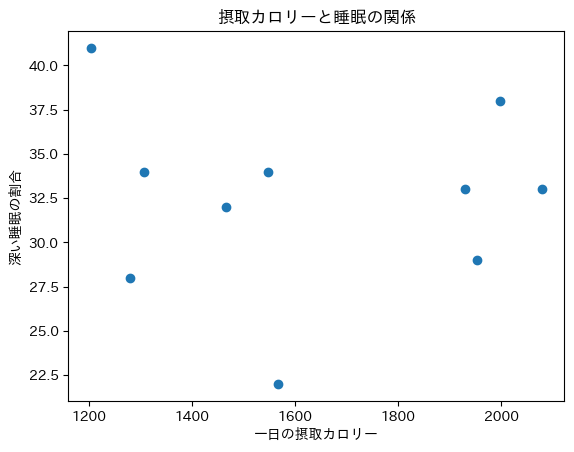

In [64]:
# 散布図を描画する
plt.scatter(X, Y)
plt.xlabel("一日の摂取カロリー") # x軸のラベル
plt.ylabel("深い睡眠の割合") # y軸のラベル
plt.title("摂取カロリーと睡眠の関係") # グラフのタイトル
plt.show()

In [65]:
# パラメータの初期化
a = 0
b = 0

# 学習率 (learning rate) - 1歩の大きさ
learning_rate = 0.0001

# 繰り返しの回数 (iterations)
iterations = 100

# データ数
m = len(X)

# 勾配降下法のループ
for i in range(iterations):
    # 1. 現在のa, bでの予測値を計算
    Y_pred = a * X + b
    
    # 2. コスト関数の勾配（傾き）を計算
    # ちょっと難しい数式だけど、aとbそれぞれでコスト関数の偏微分（へんびぶん）を計算しているよ
    D_a = (-2/m) * sum(X * (Y - Y_pred))
    D_b = (-2/m) * sum(Y - Y_pred)
    
    # 3. aとbを更新（谷を少し下る）
    a = a - learning_rate * D_a
    b = b - learning_rate * D_b
    
    # 途中の経過を見てみよう (100回ごとに表示)
    # if (i+1) % 100 == 0:
        # コスト（ズレの2乗の平均）を計算
    #     cost = np.sum((Y - Y_pred)**2) / m
    #     print(f"{i+1}回目: a={a:.3f}, b={b:.3f}, コスト={cost:.2f}")

print("\n学習完了！")
print(f"見つかった最適な傾き a: {a:.3f}")
print(f"見つかった最適な切片 b: {b:.3f}")


学習完了！
見つかった最適な傾き a: -277600376896301942737111605238459337571662169081241542269338073204328345951581562420540022092530342308762927743481147934479694152640217997238018905889598495186916802985682788868385535094580759174341231357650484007499194311843792316569513443250188673964493936624328176041984.000
見つかった最適な切片 b: -164020262236032798004137338333249053517160881633521456949366240538745626320583755510531220137498614192471144186973057668125524276477191614406156400295660087833439665227542805906669064972213896620618783159997175240257651615230171855057640943177890523285740036819228033024.000


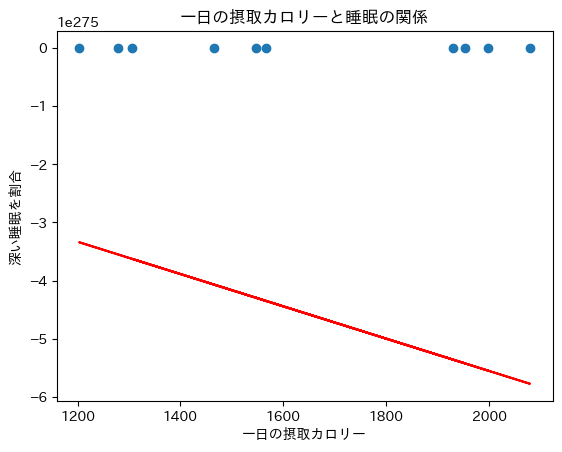

In [66]:
# 散布図を再度描画
plt.scatter(X, Y)

# 見つけ出した直線を描画
plt.plot(X, a * X + b, color='red')

plt.xlabel("一日の摂取カロリー")
plt.ylabel("深い睡眠を割合")
plt.title("一日の摂取カロリーと睡眠の関係")
plt.show()

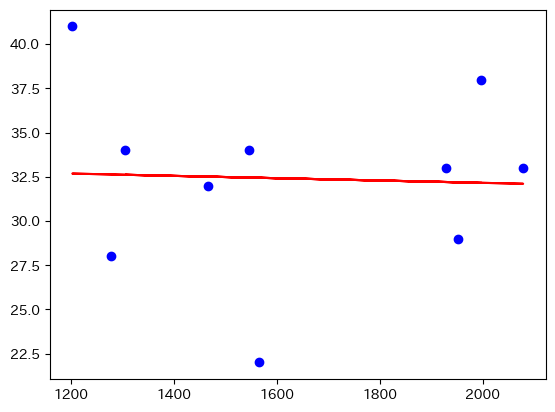

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = X.reshape(-1, 1)
lr.fit(X, Y)
y_pred = lr.predict(X)
plt.scatter(X, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X, y_pred, color = 'red') # 回帰直線をプロット
plt.show()

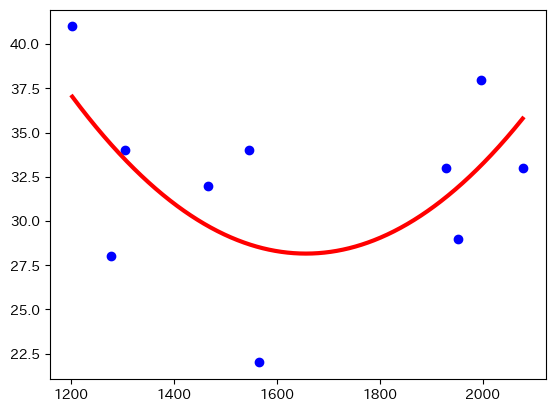

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 2次元の特徴量に変換
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
 
# y = b0 + b1x + b2x^2 の b0～b2 を算出
model = LinearRegression()
model.fit(x_poly, Y)
# y_pred = model.predict(x_poly)

X_fit          = np.arange(x.min(), x.max(), 1)[:, np.newaxis]
X_quad_fit     = polynomial_features.fit_transform(X_fit)
y_quad_predict = model.predict(X_quad_fit)

plt.scatter(X, Y, color = 'blue')
plt.plot(X_fit, 
         y_quad_predict, 
         color='red', 
         lw=3,
        )
plt.show()